# 데이터 분석 및 학습 과제
- 데이터 : acc_train.csv / acc_test.csv
- 목적 : 음주운전 여부 분류 모델 학습


In [ ]:
# google drive에 있는 데이터를 사용하기 위해 접근

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# current work path

import os
os.chdir('/content/drive/MyDrive/숨고/김성배님(교통사고 머신러닝 플젝)')

## Library import & setting

In [ ]:
# 아래 코드 실행 후, 반드시 런타임 다시시작 하여 처음부터 시작해야함
!apt -qq -y install fonts-nanum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [ ]:
# csv 형태의 필요 데이터 수집(test set은 실제 데이터라고 가정하여 분포를 모르는 상황 --> train set으로 분석)
acc_train = pd.read_csv("acc_train.csv")
acc_train = acc_train.set_index('my_id')
print("Shape of train set : " ,acc_train.shape)

Shape of train set :  (59589, 20)


In [ ]:
acc_train

,사고일시,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자차종,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전
my_id,,,,,,,,,,,,,,,,,,,,
A000002,2020년 4월 16일 05시,영등포구 여의도동,0,1,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,59.0,상해없음,보행자,남,71.0,중상,0
A000003,2020년 3월 3일 22시,성북구 동소문동3가,0,0,1,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,66.0,상해없음,승용,남,40.0,경상,0
A000004,2019년 5월 17일 18시,구로구 가리봉동,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,42.0,상해없음,개인형이동수단(PM),남,63.0,경상,0
A000005,2019년 11월 18일 07시,구로구 오류동,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 젖음/습기,흐림,교차로 - 교차로안,승용,남,57.0,상해없음,승용,여,57.0,중상,0
A000006,2019년 5월 21일 14시,마포구 합정동,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,52.0,상해없음,승용,남,38.0,경상,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A074478,2020년 10월 8일 20시,중구 충무로3가,0,0,4,0,차대차 - 후진중충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,58.0,상해없음,승용,남,30.0,경상,0
A074479,2020년 10월 10일 20시,중랑구 망우동,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,41.0,상해없음,승용,남,64.0,경상,0
A074480,2020년 7월 1일 21시,영등포구 영등포동1가,0,0,2,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,16.0,상해없음,승용,여,41.0,경상,0


In [ ]:
acc_train.to_csv("./acc_train2.csv", encoding="utf-8-sig")

In [ ]:
# train set의 정보 확인
acc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59589 entries, A000002 to A074483
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고일시       59589 non-null  object 
 1   사고지역       59589 non-null  object 
 2   사망자수       59589 non-null  int64  
 3   중상자수       59589 non-null  int64  
 4   경상자수       59589 non-null  int64  
 5   부상신고자수     59589 non-null  int64  
 6   사고유형       59589 non-null  object 
 7   법규위반       59589 non-null  object 
 8   노면상태       59589 non-null  object 
 9   기상상태       58859 non-null  object 
 10  도로형태       59589 non-null  object 
 11  가해운전자차종    58158 non-null  object 
 12  가해운전자성별    58163 non-null  object 
 13  가해운전자연령    58154 non-null  float64
 14  가해운전자상해정도  56084 non-null  object 
 15  피해운전자차종    57796 non-null  object 
 16  피해운전자성별    57796 non-null  object 
 17  피해운전자연령    57661 non-null  float64
 18  피해운전자상해정도  57796 non-null  object 
 19  음주운전       59589 non-null  int64  
dtypes: 

In [ ]:
acc_train

,사고일시,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자차종,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전
my_id,,,,,,,,,,,,,,,,,,,,
A000002,2020년 4월 16일 05시,영등포구 여의도동,0,1,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,59.0,상해없음,보행자,남,71.0,중상,0
A000003,2020년 3월 3일 22시,성북구 동소문동3가,0,0,1,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,66.0,상해없음,승용,남,40.0,경상,0
A000004,2019년 5월 17일 18시,구로구 가리봉동,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,42.0,상해없음,개인형이동수단(PM),남,63.0,경상,0
A000005,2019년 11월 18일 07시,구로구 오류동,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 젖음/습기,흐림,교차로 - 교차로안,승용,남,57.0,상해없음,승용,여,57.0,중상,0
A000006,2019년 5월 21일 14시,마포구 합정동,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,52.0,상해없음,승용,남,38.0,경상,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A074478,2020년 10월 8일 20시,중구 충무로3가,0,0,4,0,차대차 - 후진중충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,58.0,상해없음,승용,남,30.0,경상,0
A074479,2020년 10월 10일 20시,중랑구 망우동,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,41.0,상해없음,승용,남,64.0,경상,0
A074480,2020년 7월 1일 21시,영등포구 영등포동1가,0,0,2,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,16.0,상해없음,승용,여,41.0,경상,0


## Data Preprocessing - EDA

<Axes: xlabel='음주운전', ylabel='count'>

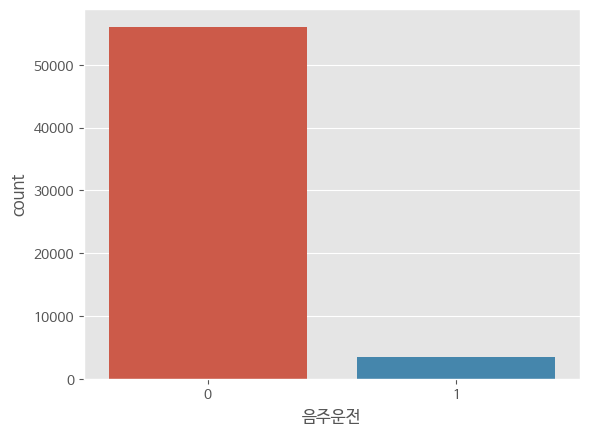

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family = 'NanumBarunGothic')

# 음주운전 여부에 따른 분포 확인
sns.countplot(x='음주운전', data=acc_train)


* 비율 차이가 매우 크므로, 학습 성능이 낮다면 언밸런스한 비율이 문제일 가능성도 존재

In [ ]:
# train set의 null data 확인
acc_train.isnull().sum()

사고일시            0
사고지역            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
사고유형            0
법규위반            0
노면상태            0
기상상태          730
도로형태            0
가해운전자차종      1431
가해운전자성별      1426
가해운전자연령      1435
가해운전자상해정도    3505
피해운전자차종      1793
피해운전자성별      1793
피해운전자연령      1928
피해운전자상해정도    1793
음주운전            0
dtype: int64

<Axes: >

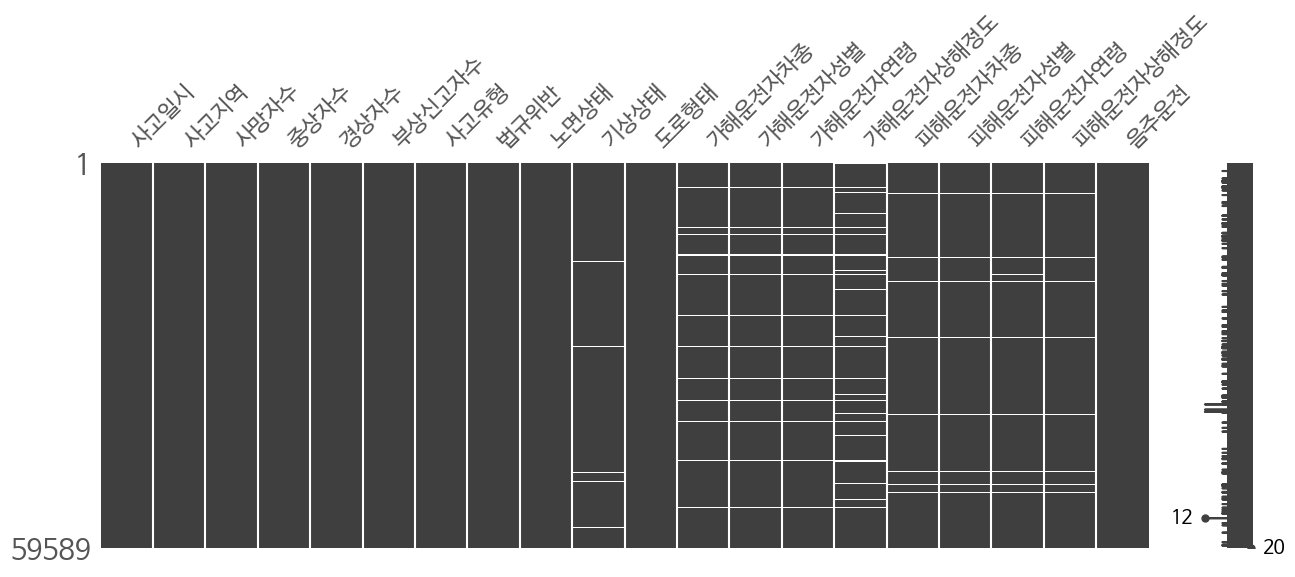

In [ ]:
# 그래프를 통한 null data 확인(null data는 비어있는 부분으로 표시됨)
import missingno as msno
msno.matrix(acc_train, figsize=(15,5))

* 추후 null값에 대한 처리 필요(삭제, 평균/중앙값 대치, 회귀 예측 등)

In [ ]:
# 시간에 따른 음주운전 여부 분석

acc_train['사고일시'] = pd.to_datetime(acc_train['사고일시'], format="%Y년 %m월 %d일 %H시", errors='coerce')
acc_train['년도'] = acc_train['사고일시'].dt.year
acc_train['분기'] = acc_train['사고일시'].dt.quarter
acc_train['월'] = acc_train['사고일시'].dt.month
acc_train['요일'] = acc_train['사고일시'].dt.weekday
acc_train['시간'] = acc_train['사고일시'].dt.hour

acc_train.head()

,사고일시,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,...,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전,년도,분기,월,요일,시간
my_id,,,,,,,,,,,,,,,,,,,,,
A000002,2020-04-16 05:00:00,영등포구 여의도동,0,1,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,...,보행자,남,71.0,중상,0,2020,2,4,3,5
A000003,2020-03-03 22:00:00,성북구 동소문동3가,0,0,1,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,...,승용,남,40.0,경상,0,2020,1,3,1,22
A000004,2019-05-17 18:00:00,구로구 가리봉동,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,...,개인형이동수단(PM),남,63.0,경상,0,2019,2,5,4,18
A000005,2019-11-18 07:00:00,구로구 오류동,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 젖음/습기,흐림,...,승용,여,57.0,중상,0,2019,4,11,0,7
A000006,2019-05-21 14:00:00,마포구 합정동,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,...,승용,남,38.0,경상,0,2019,2,5,1,14


Text(0, 0.5, '비음주운전')

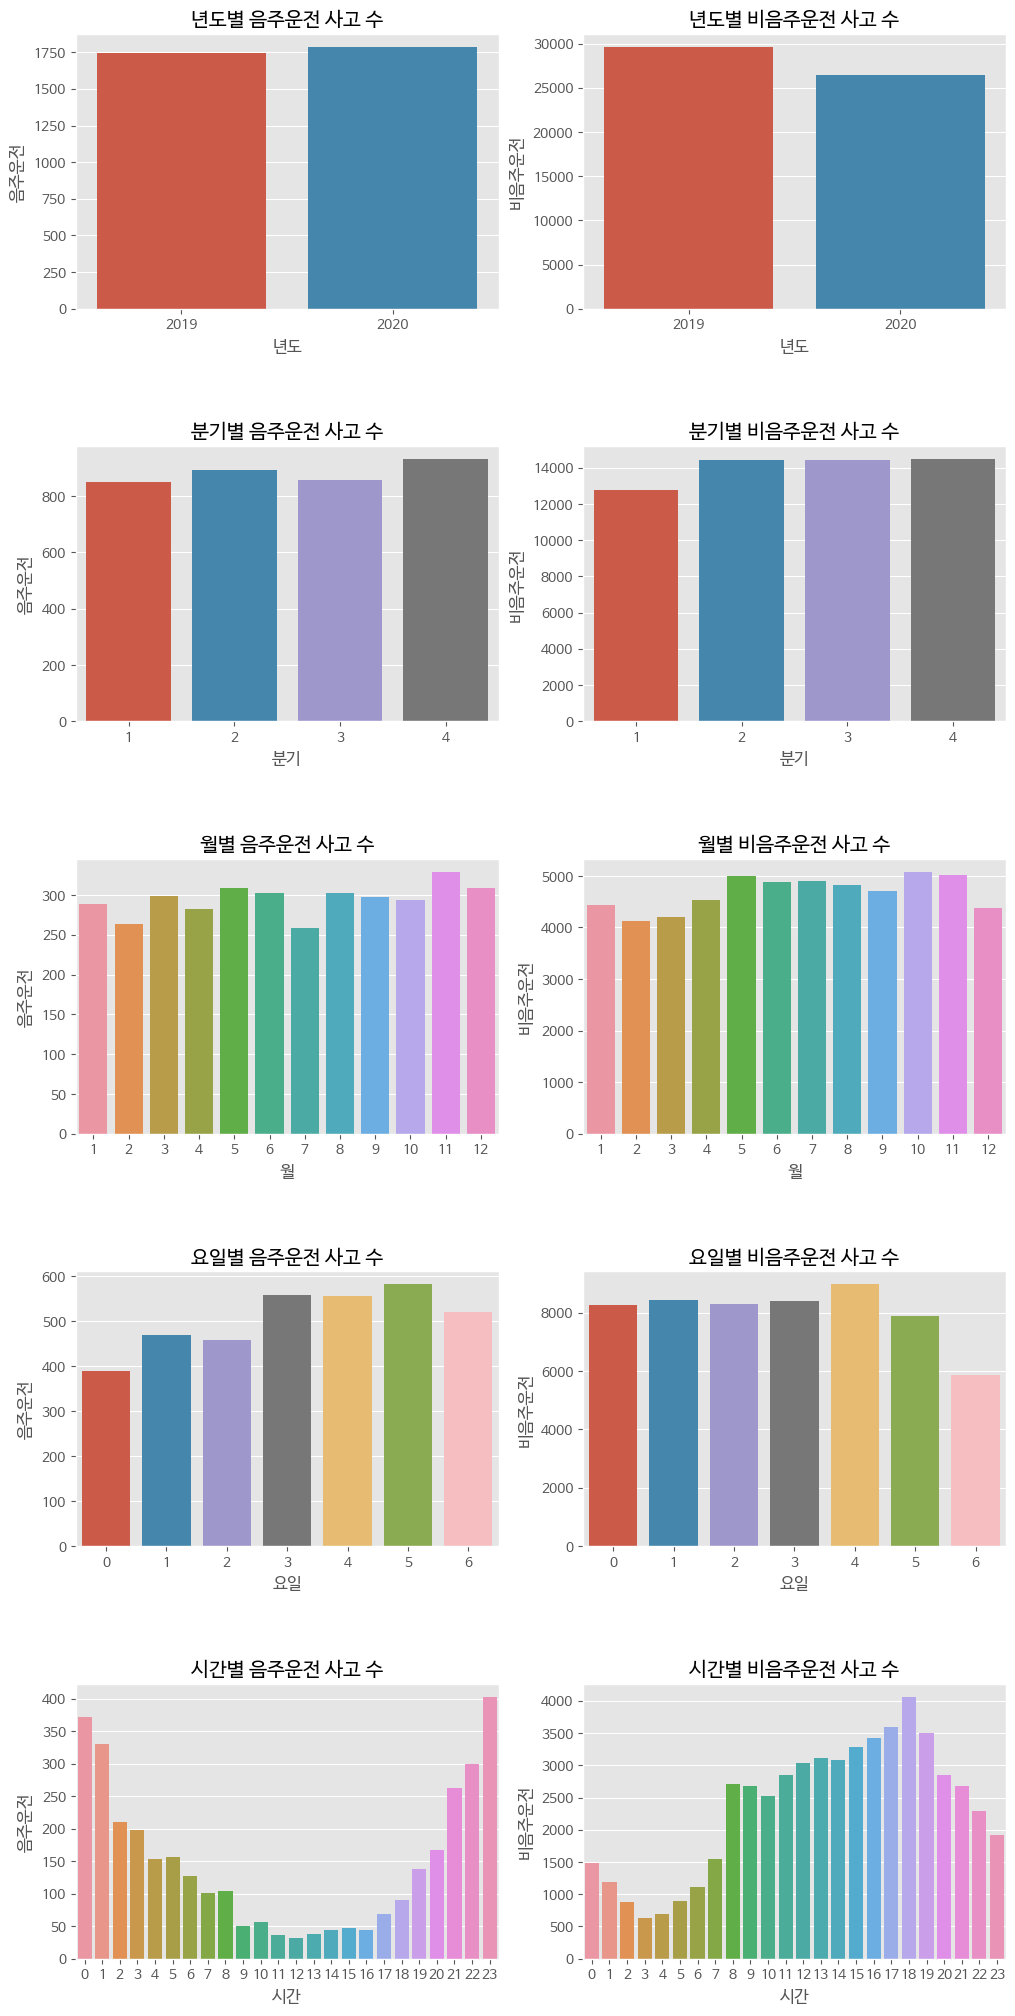

In [ ]:
acc_by_year = acc_train.groupby(['년도']).sum(['음주운전']).reset_index()
acc_by_quarter = acc_train.groupby(['분기']).sum(['음주운전']).reset_index()
acc_by_month = acc_train.groupby(['월']).sum(['음주운전']).reset_index()
acc_by_weekday = acc_train.groupby(['요일']).sum(['음주운전']).reset_index()
acc_by_time = acc_train.groupby(['시간']).sum(['음주운전']).reset_index()

acc_by_year_0 = acc_train[acc_train['음주운전'] == 0].groupby(['년도'])['음주운전'].count().reset_index()
acc_by_quarter_0 = acc_train[acc_train['음주운전'] == 0].groupby(['분기'])['음주운전'].count().reset_index()
acc_by_month_0 = acc_train[acc_train['음주운전'] == 0].groupby(['월'])['음주운전'].count().reset_index()
acc_by_weekday_0 = acc_train[acc_train['음주운전'] == 0].groupby(['요일'])['음주운전'].count().reset_index()
acc_by_time_0 = acc_train[acc_train['음주운전'] == 0].groupby(['시간'])['음주운전'].count().reset_index()

figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(12,25))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_year, x="년도", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_quarter, x="분기", y="음주운전", ax=ax3)
sns.barplot(data=acc_by_month, x="월", y="음주운전", ax=ax5)
sns.barplot(data=acc_by_weekday, x="요일", y="음주운전", ax=ax7)
sns.barplot(data=acc_by_time, x="시간", y="음주운전", ax=ax9)
sns.barplot(data=acc_by_year_0, x="년도", y="음주운전", ax=ax2)
sns.barplot(data=acc_by_quarter_0, x="분기", y="음주운전", ax=ax4)
sns.barplot(data=acc_by_month_0, x="월", y="음주운전", ax=ax6)
sns.barplot(data=acc_by_weekday_0, x="요일", y="음주운전", ax=ax8)
sns.barplot(data=acc_by_time_0, x="시간", y="음주운전", ax=ax10)

ax1.set(title="년도별 음주운전 사고 수")
ax3.set(title="분기별 음주운전 사고 수")
ax5.set(title="월별 음주운전 사고 수")
ax7.set(title="요일별 음주운전 사고 수")
ax9.set(title="시간별 음주운전 사고 수")

ax2.set(title="년도별 비음주운전 사고 수")
ax2.set_ylabel("비음주운전")
ax4.set(title="분기별 비음주운전 사고 수")
ax4.set_ylabel("비음주운전")
ax6.set(title="월별 비음주운전 사고 수")
ax6.set_ylabel("비음주운전")
ax8.set(title="요일별 비음주운전 사고 수")
ax8.set_ylabel("비음주운전")
ax10.set(title="시간별 비음주운전 사고 수")
ax10.set_ylabel("비음주운전")



* 분기 및 월별 음주운전 사고 수에는 뚜렷한 차이가 보이지 않음
* 요일별은 목,금,토로 이어지는 주말간의 음주운전 사고 수가 늘어나는 것 확인
* 시간별은 두 그래프 패턴 차이가 크며, 음주운전의 경우 저녁~이른 새벽까지의 사고 수가 매우 높고 그 외는 매우 낮음을 확인
* 년도, 요일, 시간 데이터 활용 판단 -> 우선 별 다른 변환 없이 수치 그대로 사용

[Text(0, 0, '강남구'),
 Text(1, 0, '강동구'),
 Text(2, 0, '강북구'),
 Text(3, 0, '강서구'),
 Text(4, 0, '관악구'),
 Text(5, 0, '광진구'),
 Text(6, 0, '구로구'),
 Text(7, 0, '금천구'),
 Text(8, 0, '노원구'),
 Text(9, 0, '도봉구'),
 Text(10, 0, '동대문구'),
 Text(11, 0, '동작구'),
 Text(12, 0, '마포구'),
 Text(13, 0, '서대문구'),
 Text(14, 0, '서초구'),
 Text(15, 0, '성동구'),
 Text(16, 0, '성북구'),
 Text(17, 0, '송파구'),
 Text(18, 0, '양천구'),
 Text(19, 0, '영등포구'),
 Text(20, 0, '용산구'),
 Text(21, 0, '은평구'),
 Text(22, 0, '종로구'),
 Text(23, 0, '중구'),
 Text(24, 0, '중랑구')]

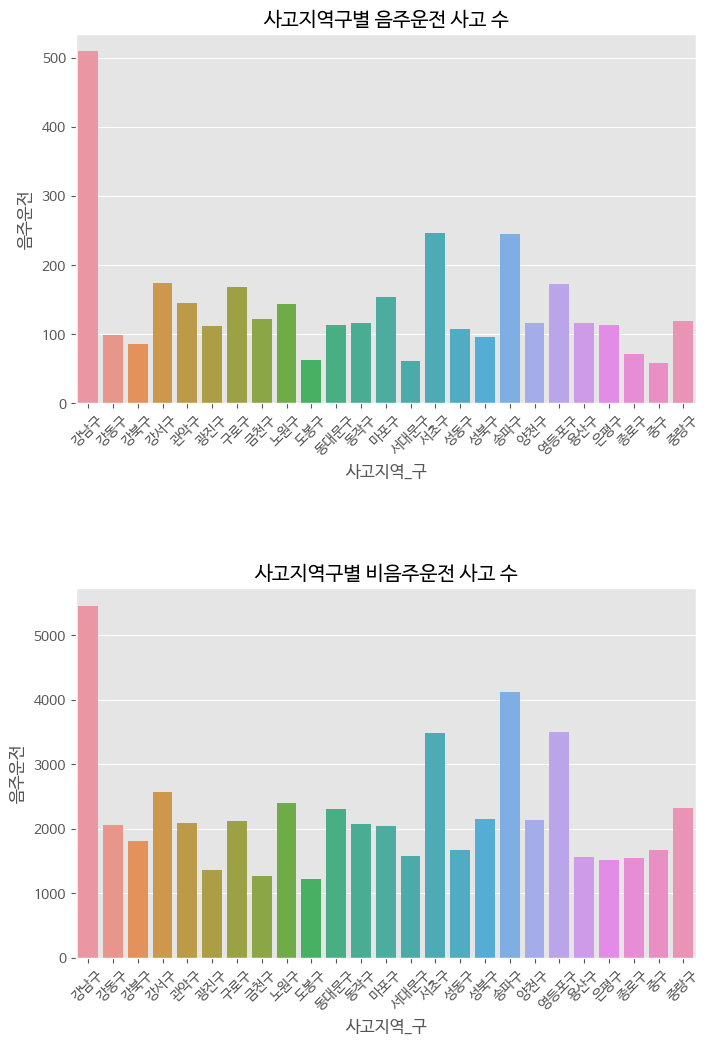

In [ ]:
# 사고지역에 따른 음주운전 여부 분석 -> 동 단위는 너무 많으므로, 구 단위로 묶은 것으로 분석
acc_train['사고지역_구'] = acc_train['사고지역'].str.split(' ').str[0]
acc_train = acc_train.loc[~acc_train['사고지역_구'].isin(["류"])]
col = {'사고지역':'사고지역_동'}
acc_train = acc_train.rename(columns=col)
acc_by_gu = acc_train.groupby(['사고지역_구']).sum(['음주운전']).reset_index()
acc_by_gu_0 = acc_train[acc_train['음주운전'] == 0].groupby(['사고지역_구'])['음주운전'].count().reset_index()

figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
plt.subplots_adjust(hspace=0.5)
sns.barplot(data=acc_by_gu, x="사고지역_구", y="음주운전",ax=ax1)
sns.barplot(data=acc_by_gu_0, x="사고지역_구", y="음주운전", ax=ax2)

ax1.set(title="사고지역구별 음주운전 사고 수")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set(title="사고지역구별 비음주운전 사고 수")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


* 둘 모두 강남구가 다른 구에 비해 압도적으로 높으며, 비슷한 패턴을 보임
* 여기서는 강남구/그 외로 분류 필요시 다르게 분리해도 무방

In [ ]:
# 사고유형에 따른 음주운전 여부 분석
print("사고 유형 종류 : ",len(acc_train['사고유형'].unique()))
print(acc_train.groupby(['사고유형'])['음주운전'].sum().reset_index().sort_values(by=['음주운전'],ascending=False))
print("\n")
print(acc_train[acc_train['음주운전'] == 0].groupby(['사고유형'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False))

사고 유형 종류 :  17
                 사고유형  음주운전
7            차대차 - 추돌  1651
8          차대차 - 측면충돌   707
5            차대차 - 기타   444
6          차대차 - 정면충돌   184
0           차대사람 - 기타   136
10       차량단독 - 공작물충돌    78
4          차대사람 - 횡단중    77
11          차량단독 - 기타    72
14   차량단독 - 전도전복 - 전도    59
9         차대차 - 후진중충돌    51
3        차대사람 - 차도통행중    29
2        차대사람 - 보도통행중    25
1   차대사람 - 길가장자리구역통행중    17
15   차량단독 - 전도전복 - 전복     2
16   차량단독 - 주/정차차량 충돌     1
12  차량단독 - 도로외이탈 - 기타     0
13  차량단독 - 도로외이탈 - 추락     0


                 사고유형   음주운전
8          차대차 - 측면충돌  18935
5            차대차 - 기타  12354
7            차대차 - 추돌   7263
0           차대사람 - 기타   5823
4          차대사람 - 횡단중   4874
6          차대차 - 정면충돌   1375
3        차대사람 - 차도통행중   1372
11          차량단독 - 기타   1169
2        차대사람 - 보도통행중    957
1   차대사람 - 길가장자리구역통행중    799
9         차대차 - 후진중충돌    720
10       차량단독 - 공작물충돌    268
14   차량단독 - 전도전복 - 전도    123
13  차량단독 - 도로외이탈 - 추락      8
15   차량단독 - 전도전복 - 전복      6
12  차량단독 - 도로외이

* 17개 유형이므로, 학습의 효율성을 위해 대단위로 재분류 판단

[Text(0.5, 1.0, '사고유형별 비음주운전 사고 수')]

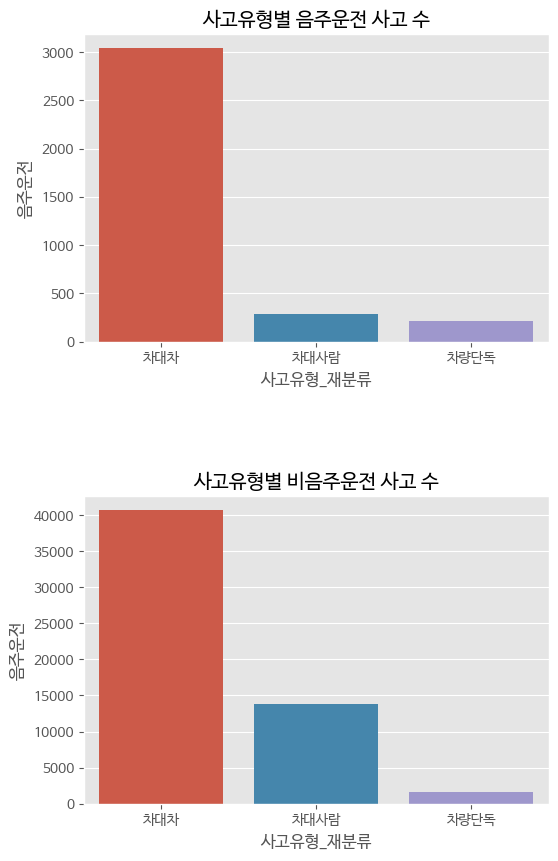

In [ ]:
acc_train['사고유형_재분류'] = acc_train['사고유형'].str.split(' - ').str[0]

acc_by_type = acc_train.groupby(['사고유형_재분류']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_type_0 = acc_train[acc_train['음주운전'] == 0].groupby(['사고유형_재분류'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)
sns.barplot(data=acc_by_type, x="사고유형_재분류", y="음주운전",ax=ax1)
sns.barplot(data=acc_by_type_0, x="사고유형_재분류", y="음주운전", ax=ax2)

ax1.set(title="사고유형별 음주운전 사고 수")
ax2.set(title="사고유형별 비음주운전 사고 수")


In [ ]:
# 법규위반에 따른 음주운전 여부 분석
print("법규위반 종류 : ",len(acc_train['법규위반'].unique()))
print("\n 음주운전")
print(acc_train.groupby(['법규위반'])['음주운전'].sum().reset_index().sort_values(by=['음주운전'],ascending=False))
print("\n 비음주운전")
print(acc_train[acc_train['음주운전'] == 0].groupby(['법규위반'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False))

법규위반 종류 :  11

 음주운전
         법규위반  음주운전
7     안전운전불이행  2646
5        신호위반   286
6     안전거리미확보   250
8       중앙선침범   169
2          기타    71
1   교차로운행방법위반    28
0          과속    25
10       차로위반    21
3   보행자보호의무위반    17
9   직진우회전진행방해    13
4        불법유턴     7

 비음주운전
         법규위반   음주운전
7     안전운전불이행  30439
6     안전거리미확보   8025
5        신호위반   6945
2          기타   2222
3   보행자보호의무위반   2151
1   교차로운행방법위반   2085
8       중앙선침범   1419
9   직진우회전진행방해   1187
10       차로위반   1049
4        불법유턴    390
0          과속    141


* 11개의 유형 중 안전운전불이행의 음주운전 비율이 압도적으로 높으나, 음주운전과 비음주운전간 빈도 패턴의 차이가 존재하므로 one-hot-encoding 사용

In [ ]:
# 노면상태에 따른 음주운전 여부 분석
print("노면상태 종류 : ",len(acc_train['노면상태'].unique()))
print("\n 음주운전")
print(acc_train.groupby(['노면상태'])['음주운전'].sum().reset_index().sort_values(by=['음주운전'],ascending=False))
print("\n 비음주운전")
print(acc_train[acc_train['음주운전'] == 0].groupby(['노면상태'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False))

노면상태 종류 :  11

 음주운전
           노면상태  음주운전
4       포장 - 건조  3021
8    포장 - 젖음/습기   438
5       포장 - 기타    65
6    포장 - 서리/결빙     3
2   비포장 - 젖음/습기     2
7       포장 - 적설     2
0      비포장 - 건조     1
1      비포장 - 기타     1
3      비포장 - 해빙     0
9       포장 - 침수     0
10      포장 - 해빙     0

 비음주운전
           노면상태   음주운전
4       포장 - 건조  50724
8    포장 - 젖음/습기   4416
5       포장 - 기타    790
6    포장 - 서리/결빙     43
7       포장 - 적설     33
2   비포장 - 젖음/습기     20
0      비포장 - 건조     15
1      비포장 - 기타      6
9       포장 - 침수      3
10      포장 - 해빙      2
3      비포장 - 해빙      1


* 11개의 유형 중 노면상태의 포장 - 건조 비율이 압도적으로 높고, 음주운전과 비음주운전간의 뚜렷한 차이가 보이지 않으므로 포장 - 건조/그 외로 분류해도 좋을 것으로 판단
* 혹은 포장, 비포장으로 분류해도 좋음(분석가 주관)

[Text(0.5, 1.0, '노면상태별 비음주운전 사고 수')]

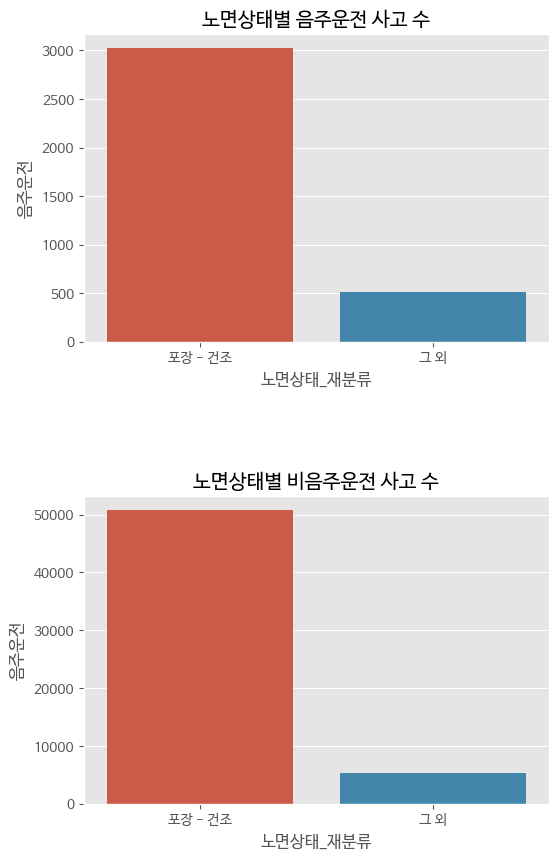

In [ ]:
acc_train['노면상태_재분류'] = acc_train['노면상태'].apply(lambda x : x if x == "포장 - 건조" else "그 외")

acc_by_roadstate = acc_train.groupby(['노면상태_재분류']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_roadstate_0 = acc_train[acc_train['음주운전'] == 0].groupby(['노면상태_재분류'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)
sns.barplot(data=acc_by_roadstate, x="노면상태_재분류", y="음주운전",ax=ax1)
sns.barplot(data=acc_by_roadstate_0, x="노면상태_재분류", y="음주운전", ax=ax2)

ax1.set(title="노면상태별 음주운전 사고 수")
ax2.set(title="노면상태별 비음주운전 사고 수")


In [ ]:
# 기상상태에 따른 음주운전 여부 분석
print("기상상태 종류 : ",len(acc_train['기상상태'].unique()))
print("\n 음주운전")
print(acc_train.groupby(['기상상태'])['음주운전'].sum().reset_index().sort_values(by=['음주운전'],ascending=False))
print("\n 비음주운전")
print(acc_train[acc_train['음주운전'] == 0].groupby(['기상상태'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False))

기상상태 종류 :  6

 음주운전
  기상상태  음주운전
1   맑음  2921
2    비   335
4   흐림   212
0    눈     7
3   안개     0

 비음주운전
  기상상태   음주운전
1   맑음  49724
2    비   3421
4   흐림   2141
0    눈     92
3   안개      3


* 기상상태의 경우 두 경우 모두 맑음이 압도적으로 높긴 하나, 종류가 적으므로 모두 사용하는 것으로 판단

In [ ]:
# 도로형태 따른 음주운전 여부 분석
print("도로형태 종류 : ",len(acc_train['도로형태'].unique()))
print("\n 음주운전")
print(acc_train.groupby(['도로형태'])['음주운전'].sum().reset_index().sort_values(by=['음주운전'],ascending=False))
print("\n 비음주운전")
print(acc_train[acc_train['음주운전'] == 0].groupby(['도로형태'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False))

도로형태 종류 :  11

 음주운전
               도로형태  음주운전
6          단일로 - 기타  1886
0       교차로 - 교차로부근   759
1        교차로 - 교차로안   499
3           기타 - 기타   171
5          단일로 - 교량    61
7   단일로 - 지하차도(도로)내    47
2    교차로 - 교차로횡단보도내    44
4       단일로 - 고가도로위    32
8          단일로 - 터널    22
10        주차장 - 주차장    12
9         미분류 - 미분류     0

 비음주운전
               도로형태   음주운전
6          단일로 - 기타  27043
1        교차로 - 교차로안  14395
0       교차로 - 교차로부근   7814
3           기타 - 기타   3090
2    교차로 - 교차로횡단보도내   2180
7   단일로 - 지하차도(도로)내    550
5          단일로 - 교량    411
4       단일로 - 고가도로위    216
10        주차장 - 주차장    179
8          단일로 - 터널    157
9         미분류 - 미분류     18


* 단일로, 교차로, 기타로 크게 묶을 수 있는 것 확인

[Text(0.5, 1.0, '도로형태별 비음주운전 사고 수')]

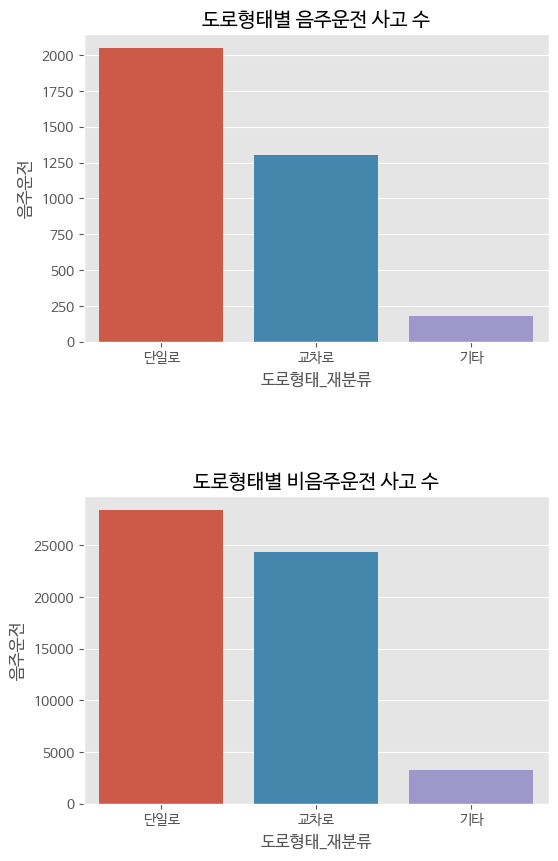

In [ ]:
# 단일로, 교차로, 기타로 크게 묶을 수 있는 것 확인
acc_train['도로형태_재분류'] = acc_train['도로형태'].str.split(' - ').str[0]
acc_train['도로형태_재분류'] = acc_train['도로형태_재분류'].apply(lambda x : x if x == "단일로" or x=="교차로" else "기타")

acc_by_roadtype = acc_train.groupby(['도로형태_재분류']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_roadtype_0 = acc_train[acc_train['음주운전'] == 0].groupby(['도로형태_재분류'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)
sns.barplot(data=acc_by_roadtype, x="도로형태_재분류", y="음주운전",ax=ax1)
sns.barplot(data=acc_by_roadtype_0, x="도로형태_재분류", y="음주운전", ax=ax2)

ax1.set(title="도로형태별 음주운전 사고 수")
ax2.set(title="도로형태별 비음주운전 사고 수")

[Text(0.5, 1.0, '피해운전자차종별 음주운전 사고 수')]

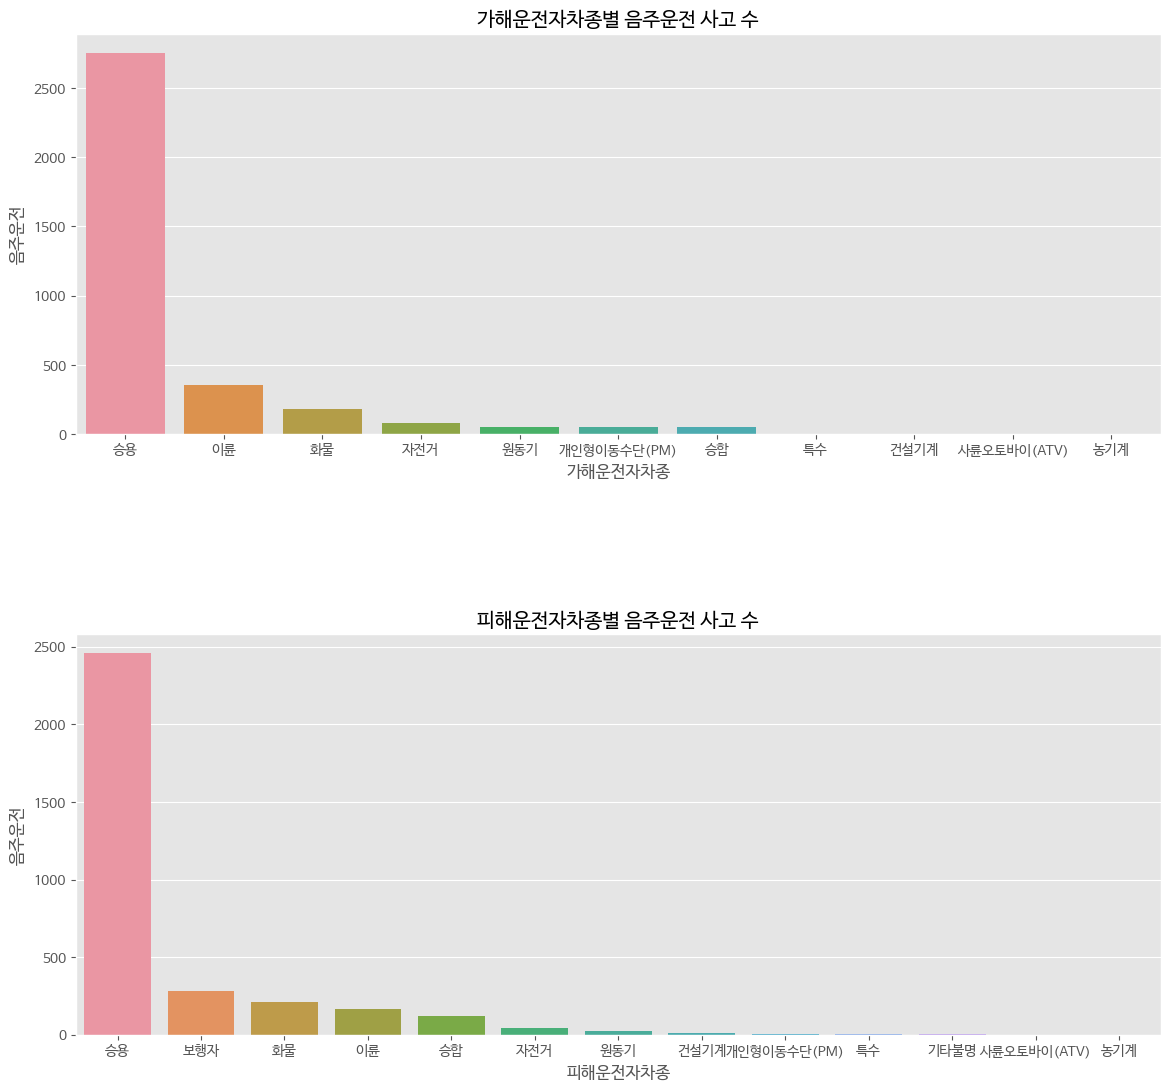

In [ ]:
# 운전자차종에 따른 음주운전 여부 분석

acc_by_per_cartype = acc_train.groupby(['가해운전자차종']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_vic_cartype = acc_train.groupby(['피해운전자차종']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(14, 13))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_per_cartype, x="가해운전자차종", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_vic_cartype, x="피해운전자차종", y="음주운전", ax=ax2)

ax1.set(title="가해운전자차종별 음주운전 사고 수")
ax2.set(title="피해운전자차종별 음주운전 사고 수")


[Text(0.5, 1.0, '피해운전자차종별 비음주운전 사고 수')]

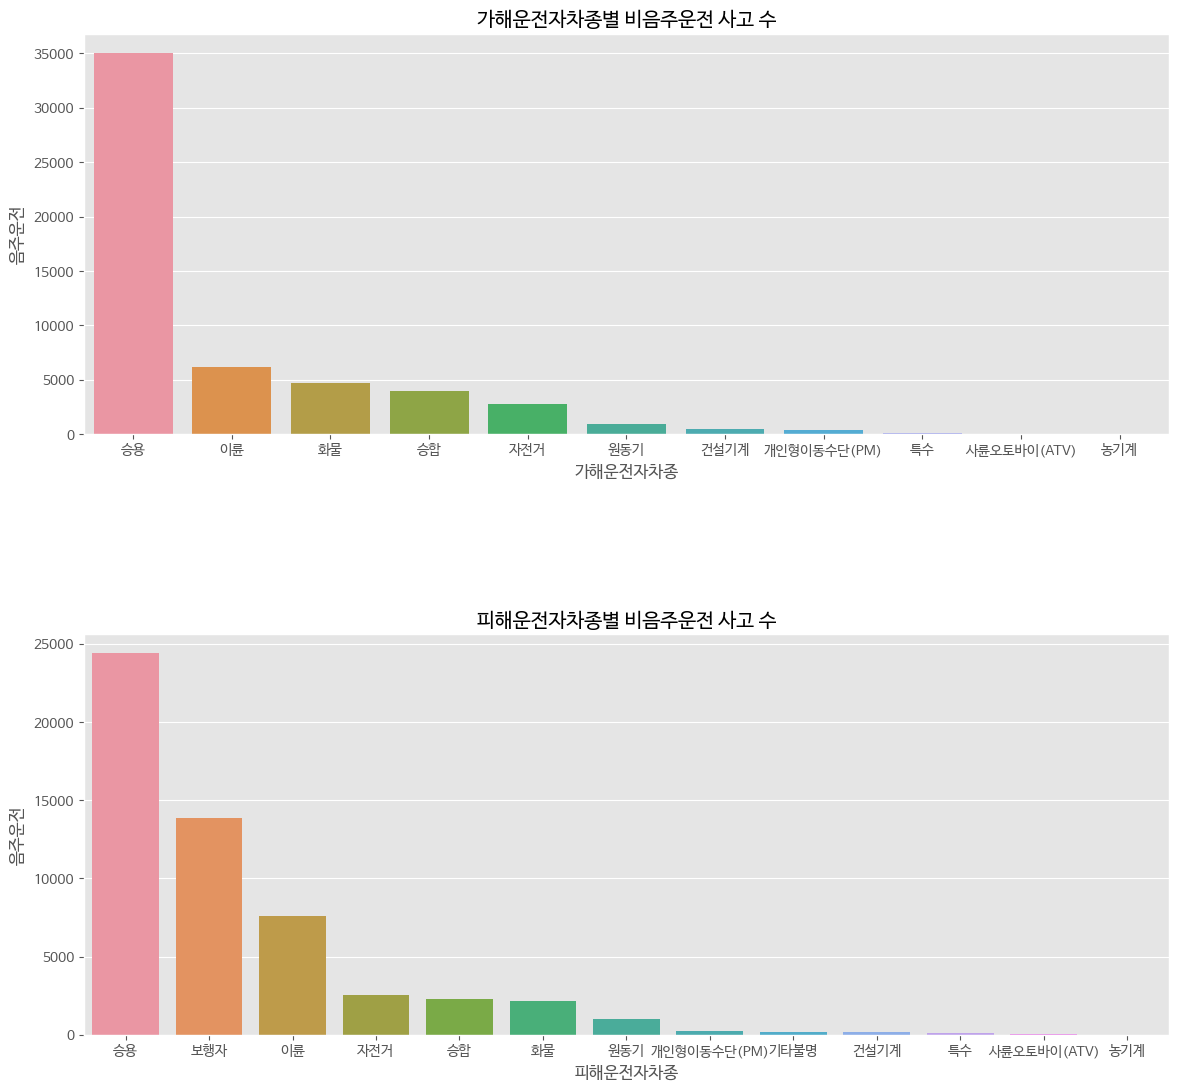

In [ ]:
# 운전자차종에 따른 비음주운전 여부 분석

acc_by_per_cartype_0 = acc_train[acc_train['음주운전'] == 0].groupby(['가해운전자차종'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_vic_cartype_0 = acc_train[acc_train['음주운전'] == 0].groupby(['피해운전자차종'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(14, 13))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_per_cartype_0, x="가해운전자차종", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_vic_cartype_0, x="피해운전자차종", y="음주운전", ax=ax2)

ax1.set(title="가해운전자차종별 비음주운전 사고 수")
ax2.set(title="피해운전자차종별 비음주운전 사고 수")


* 차종의 경우 승용이 압도적으로 많으나, 피해운전자차종의 보행자가 존재하여 두 유형 별 차이가 있음
* 따라서 승용, 보형자, 그 외로 구분하는 것이 좋을 것으로 판단

[Text(0.5, 1.0, '가해운전자차종별 비음주운전 사고 수')]

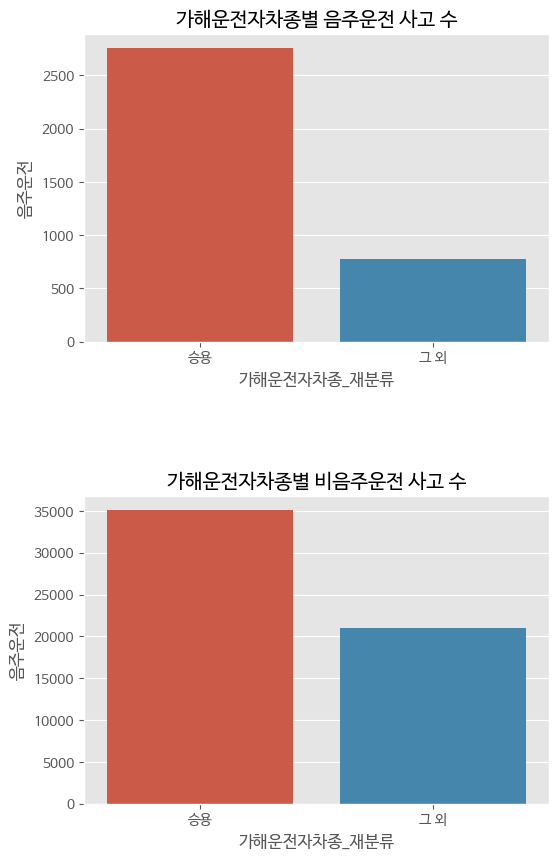

In [ ]:
acc_train['가해운전자차종_재분류'] = acc_train['가해운전자차종'].apply(lambda x : x if x == "승용" else "그 외")
acc_by_per_cartype = acc_train.groupby(['가해운전자차종_재분류']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_per_cartype_0 = acc_train[acc_train['음주운전'] == 0].groupby(['가해운전자차종_재분류'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)


figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_per_cartype, x="가해운전자차종_재분류", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_per_cartype_0, x="가해운전자차종_재분류", y="음주운전", ax=ax2)

ax1.set(title="가해운전자차종별 음주운전 사고 수")
ax2.set(title="가해운전자차종별 비음주운전 사고 수")


[Text(0.5, 1.0, '피해운전자차종별 비음주운전 사고 수')]

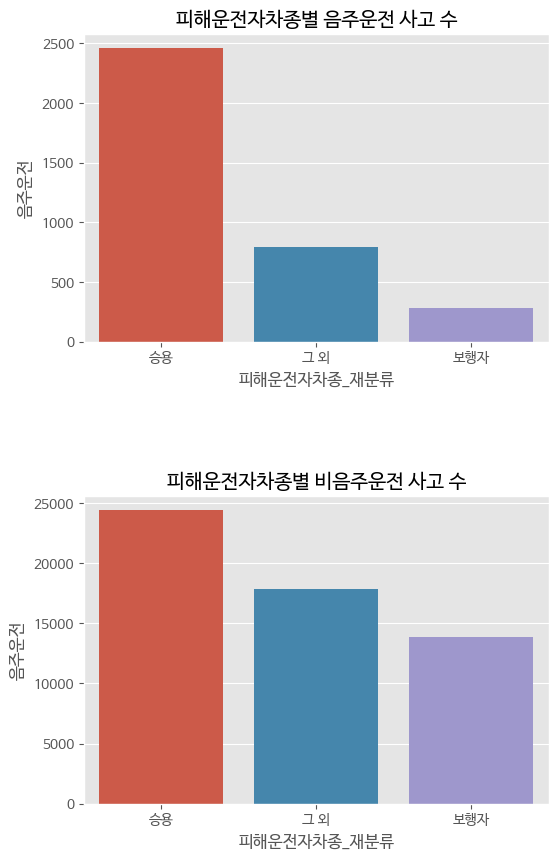

In [ ]:
acc_train['피해운전자차종_재분류'] = acc_train['피해운전자차종'].apply(lambda x: x if x == "승용" else (x if x=="보행자" else "그 외"))
acc_by_vic_cartype = acc_train.groupby(['피해운전자차종_재분류']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_vic_cartype_0 = acc_train[acc_train['음주운전'] == 0].groupby(['피해운전자차종_재분류'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)


figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_vic_cartype, x="피해운전자차종_재분류", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_vic_cartype_0, x="피해운전자차종_재분류", y="음주운전", ax=ax2)

ax1.set(title="피해운전자차종별 음주운전 사고 수")
ax2.set(title="피해운전자차종별 비음주운전 사고 수")

[Text(0.5, 1.0, '가해운전자성별 비음주운전 사고 수')]

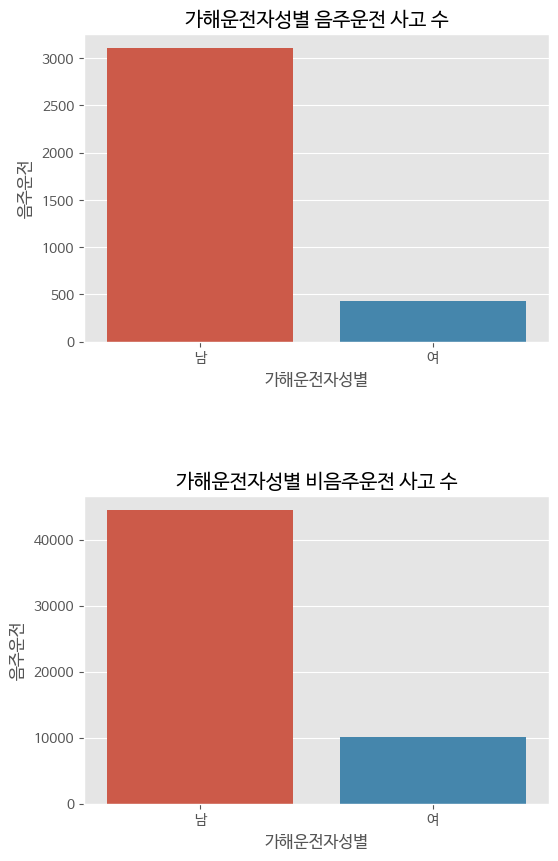

In [ ]:
# 성별에 따른 음주운전 여부 분석
acc_by_per_gender= acc_train.groupby(['가해운전자성별']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_per_gender_0 = acc_train[acc_train['음주운전'] == 0].groupby(['가해운전자성별'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_per_gender, x="가해운전자성별", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_per_gender_0, x="가해운전자성별", y="음주운전", ax=ax2)

ax1.set(title="가해운전자성별 음주운전 사고 수")
ax2.set(title="가해운전자성별 비음주운전 사고 수")

[Text(0.5, 1.0, '피해운전자성별 비음주운전 사고 수')]

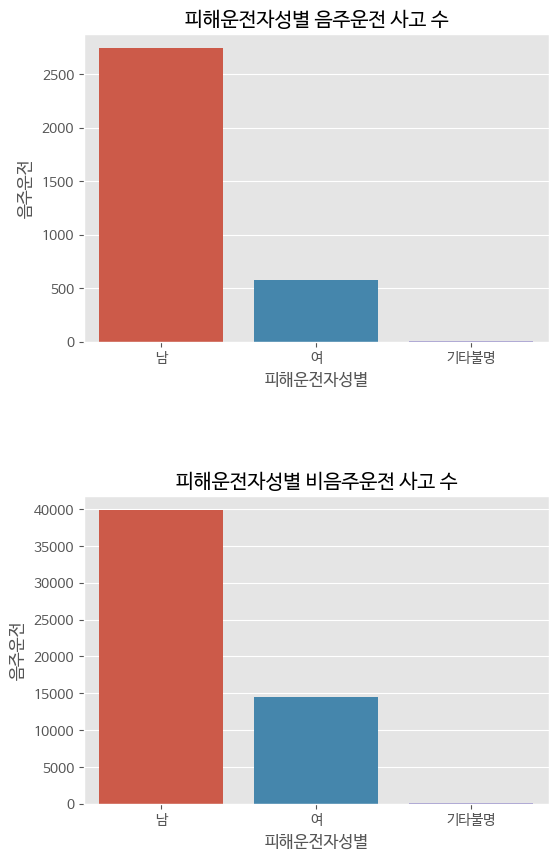

In [ ]:
acc_by_vic_gender = acc_train.groupby(['피해운전자성별']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_vic_gender_0 = acc_train[acc_train['음주운전'] == 0].groupby(['피해운전자성별'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_vic_gender, x="피해운전자성별", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_vic_gender_0, x="피해운전자성별", y="음주운전", ax=ax2)

ax1.set(title="피해운전자성별 음주운전 사고 수")
ax2.set(title="피해운전자성별 비음주운전 사고 수")

* 두 경우 모두 남자가 압도적으로 많으나, 피해 운전자의 경우 극소수의 기타불명 존재

[Text(0.5, 1.0, '가해운전자상해정도 비음주운전 사고 수')]

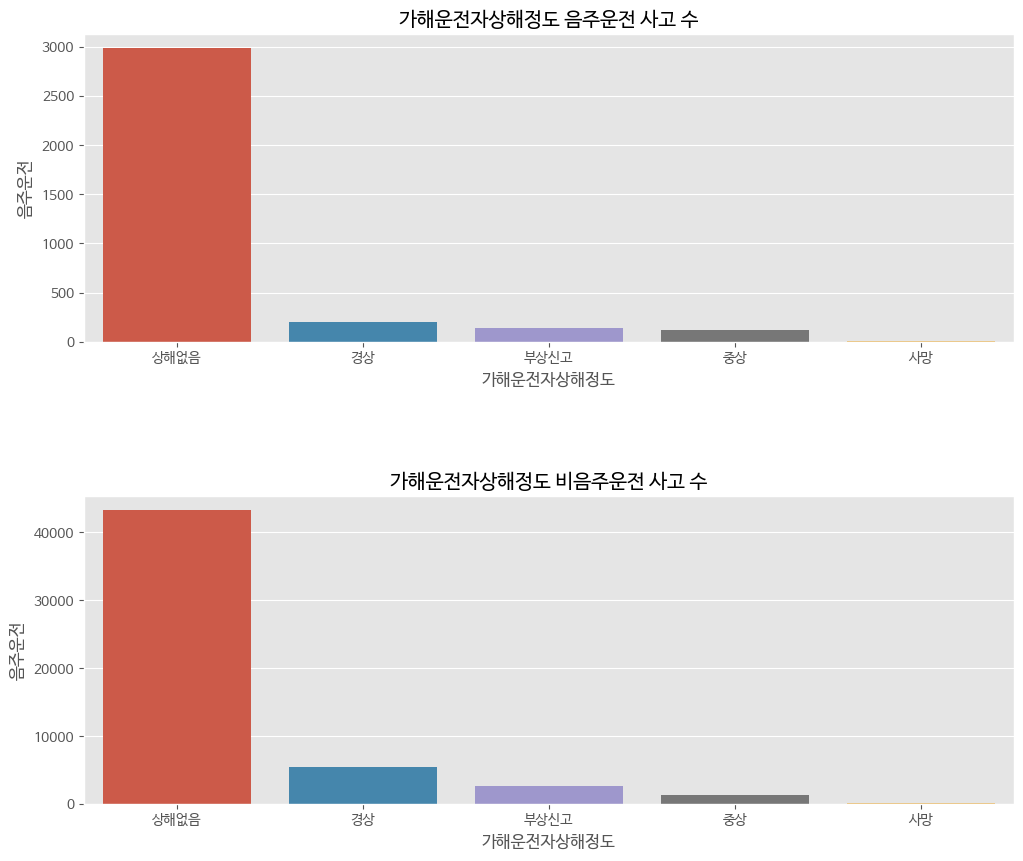

In [ ]:
#  상해정도에 따른 음주운전 여부 분석
acc_by_per_wound = acc_train.groupby(['가해운전자상해정도']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_per_wound_0 = acc_train[acc_train['음주운전'] == 0].groupby(['가해운전자상해정도'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_per_wound, x="가해운전자상해정도", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_per_wound_0, x="가해운전자상해정도", y="음주운전", ax=ax2)

ax1.set(title="가해운전자상해정도 음주운전 사고 수")
ax2.set(title="가해운전자상해정도 비음주운전 사고 수")

[Text(0.5, 1.0, '피해운전자상해정도 비음주운전 사고 수')]

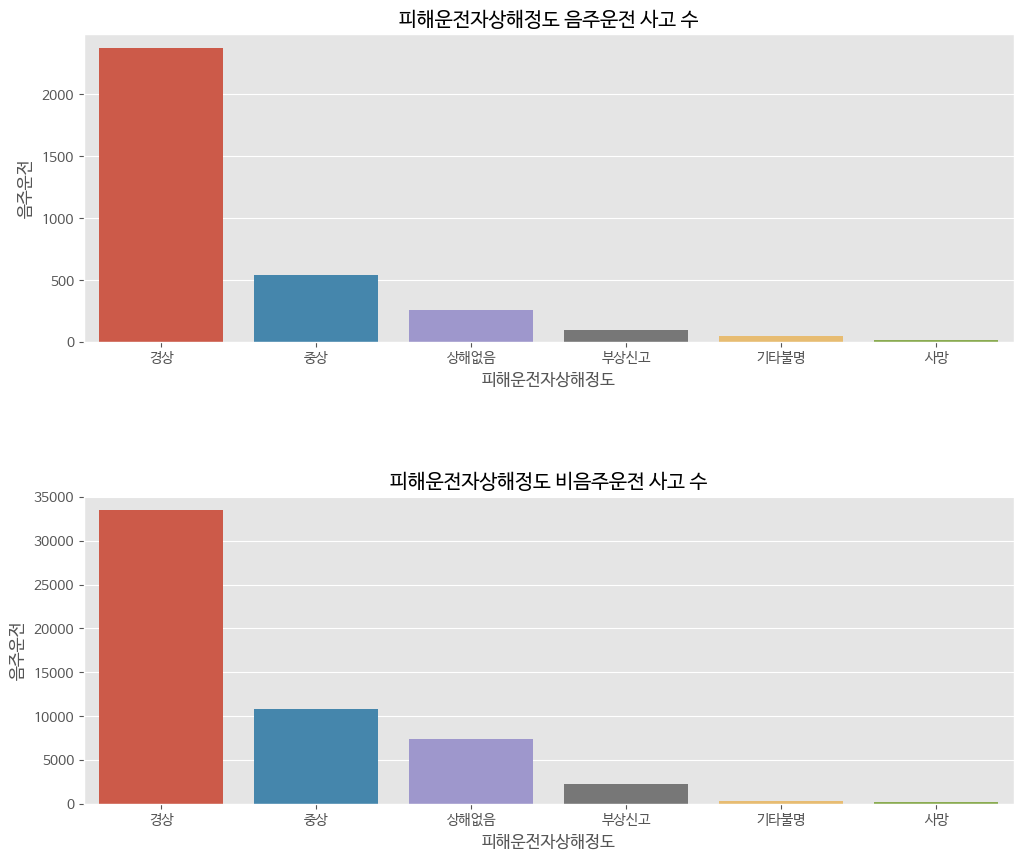

In [ ]:
acc_by_vic_wound = acc_train.groupby(['피해운전자상해정도']).sum(['음주운전']).reset_index().sort_values(by=['음주운전'],ascending=False)
acc_by_vic_wound_0 = acc_train[acc_train['음주운전'] == 0].groupby(['피해운전자상해정도'])['음주운전'].count().reset_index().sort_values(by=['음주운전'],ascending=False)

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

sns.barplot(data=acc_by_vic_wound, x="피해운전자상해정도", y="음주운전", ax=ax1)
sns.barplot(data=acc_by_vic_wound_0, x="피해운전자상해정도", y="음주운전", ax=ax2)

ax1.set(title="피해운전자상해정도 음주운전 사고 수")
ax2.set(title="피해운전자상해정도 비음주운전 사고 수")

* 가해 운전자는 대부분 상해가 없고, 피해 운전자의 경우 대부분 경상 혹은 중상임
* 나눠야 하는 class가 많지 않으므로 그대로 사용해도 좋을 것으로 판단

<Axes: ylabel='피해운전자연령'>

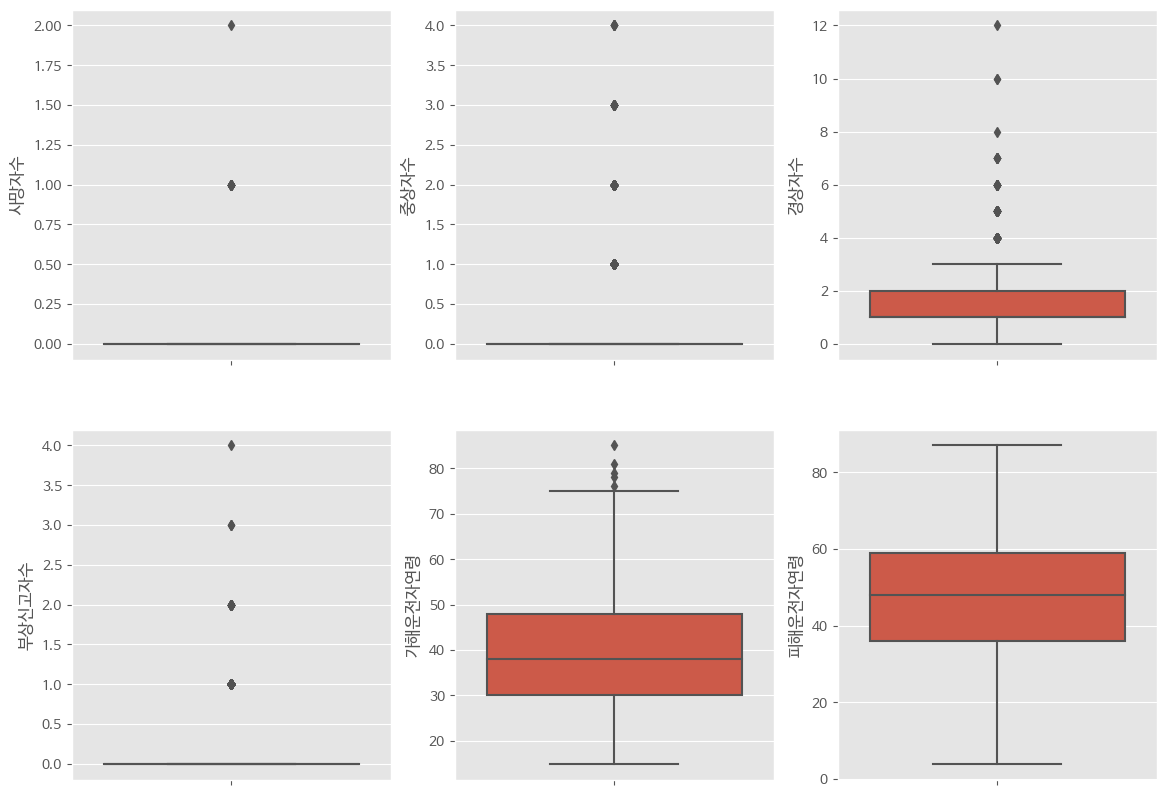

In [ ]:
# 음주운전인 경우 수치형 데이터 분포 분석
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(14, 10))
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="사망자수",orient="v",ax=axes[0][0])
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="중상자수",orient="v",ax=axes[0][1])
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="경상자수",orient="v",ax=axes[0][2])
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="부상신고자수",orient="v",ax=axes[1][0])
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="가해운전자연령",orient="v",ax=axes[1][1])
sns.boxplot(data=acc_train[acc_train['음주운전']==1],y="피해운전자연령",orient="v",ax=axes[1][2])


<Axes: ylabel='피해운전자연령'>

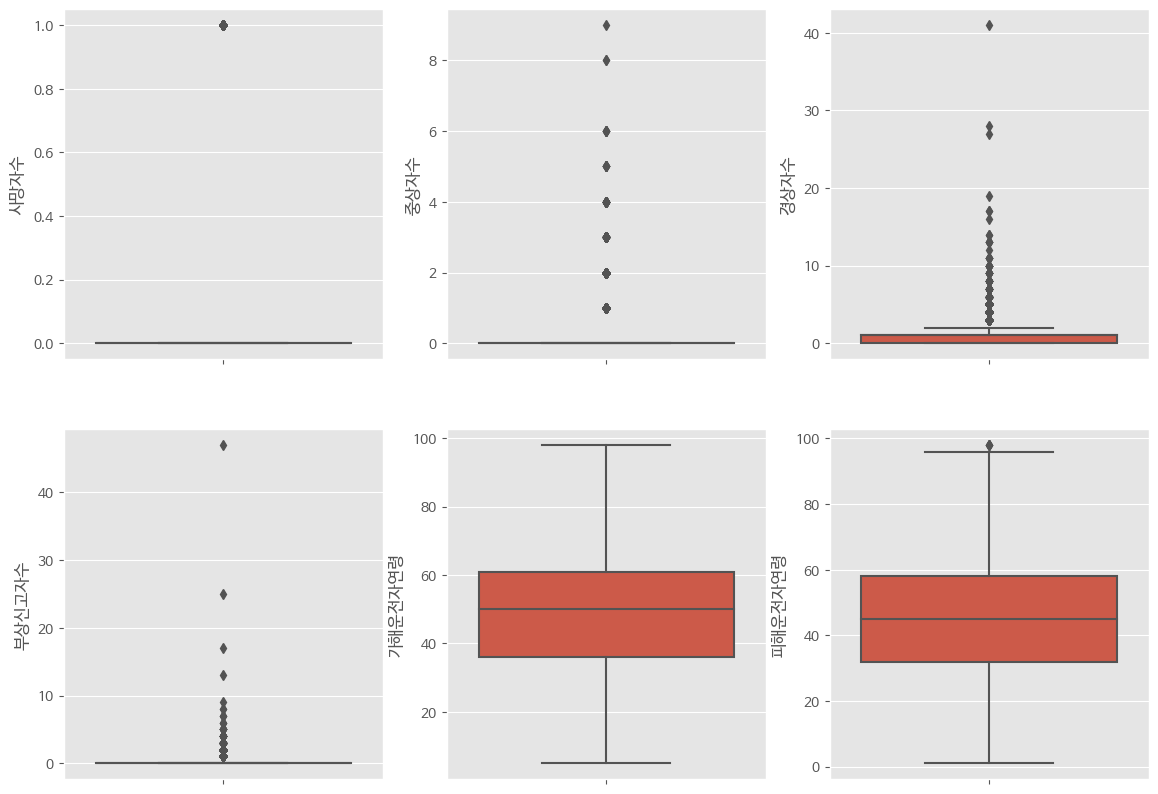

In [ ]:
# 비음주운전인 경우 수치형 데이터 분포 분석
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(14, 10))
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="사망자수",orient="v",ax=axes[0][0])
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="중상자수",orient="v",ax=axes[0][1])
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="경상자수",orient="v",ax=axes[0][2])
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="부상신고자수",orient="v",ax=axes[1][0])
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="가해운전자연령",orient="v",ax=axes[1][1])
sns.boxplot(data=acc_train[acc_train['음주운전']==0],y="피해운전자연령",orient="v",ax=axes[1][2])


* 비음주운전인 경우 음주운전보다 경상자 수가 더 많으며 사망/중상/부상도 근소하게 많은 편
* 음주운전인 경우 비음주운전보다 가해 운전자 연령이 상대적으로 젊은 편

             사망자수      중상자수      경상자수    부상신고자수   가해운전자연령   피해운전자연령
사망자수     1.000000 -0.026787 -0.065786 -0.017519  0.016462  0.063146
중상자수    -0.026787  1.000000 -0.310000 -0.071512 -0.000600  0.102735
경상자수    -0.065786 -0.310000  1.000000 -0.085575  0.000470 -0.045518
부상신고자수  -0.017519 -0.071512 -0.085575  1.000000 -0.046356  0.004483
가해운전자연령  0.016462 -0.000600  0.000470 -0.046356  1.000000 -0.002986
피해운전자연령  0.063146  0.102735 -0.045518  0.004483 -0.002986  1.000000


<AxesSubplot:>

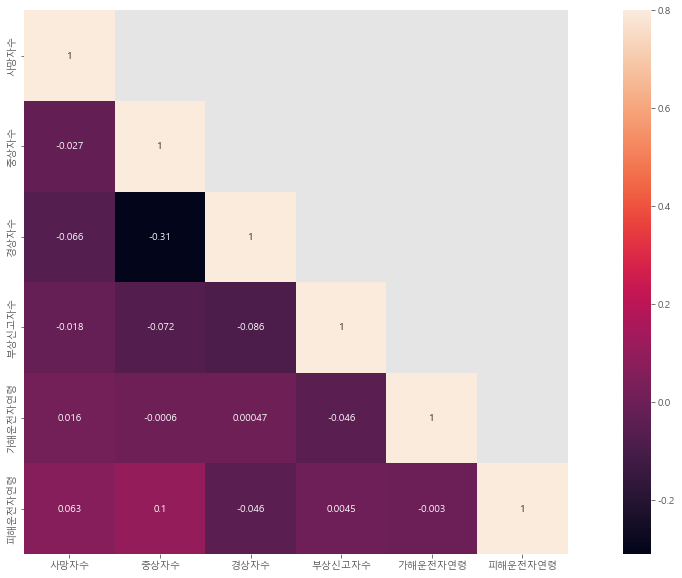

In [ ]:
# 수치형 변수들에 대한 상관관계 분석
corr = acc_train[["사망자수", "중상자수", "경상자수", "부상신고자수", "가해운전자연령", "피해운전자연령"]]
corr = corr.corr()
print(corr)

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

* 수치형 피쳐 대부분은 서로간의 큰 연관관계가 없으므로 모두 학습에 사용해도 무방할 것으로 판단

# Data Preprocessing - Feature Engineering


*Test set도 동일하게 처리해야 함*
* null값 처리 --> 삭제, 평균대치, 회귀예측 등 사용 가능하며 이 장에서는 최빈값(범주형), 중앙값(수치형) 이용
* 사고일시 : 년도, 요일, 시간 데이터 활용 판단 -> 우선 별 다른 변환 없이 수치 그대로 사용
* 사고지역 : 구 단위 모두 사용 -> one hot encoding 필요
* 사고유형 : 차대차/차대사람/차량단독 모두 사용 -> one hot encoding 필요
* 법규위반 : 모두 사용 -> one hot encoding 필요
* 노면상태 : 포장 - 건조/그 외 사용 -> one hot encoding 필요
* 기상상태 : 모두 사용 -> one hot encoding 필요
* 도로형태 : 단일로/교차로/기타 사용 -> one hot encoding 필요
* 가해운전자차종 : 승합/그 외 사용 -> one hot encoding 필요
* 가해운전자성별 : 그대로 사용 -> one hot encoding 필요
* 가해운전자상해정도 : 그대로 사용 -> one hot encoding 필요
* 피해운전자차종 : 승합/보행자/그 외 사용 ->one hot encoding 필요
* 피해운전자성별 : 그대로 사용 -> one hot encoding 필요
* 피해운전자상해정도 : 그대로 사용 -> one hot encoding 필요
* 그 외 수치형 컬럼 : 그대로 사용

In [ ]:
# Train set load (이해를 돕기 위해 다시 진행)
acc_train = pd.read_csv("acc_train.csv")
acc_train = acc_train.set_index('my_id')
print("Shape of train set : " ,acc_train.shape)

# Test set load
acc_test = pd.read_csv("acc_test.csv")
acc_test = acc_test.set_index('my_id')
print("Shape of test set : " ,acc_test.shape)

Shape of train set :  (59589, 20)
Shape of test set :  (14896, 19)


In [ ]:
# null값 처리 --> 최빈값 이용
for i in acc_train.columns:
    if acc_train[i].dtypes == 'object':
        acc_train[i] = acc_train[i].fillna(acc_train[i].mode()[0])
    else :
        acc_train[i] = acc_train[i].fillna(acc_train[i].median())

for i in acc_test.columns:
    if acc_test[i].dtypes == 'object':
        acc_test[i] = acc_test[i].fillna(acc_test[i].mode()[0])
    else :
        acc_test[i] = acc_test[i].fillna(acc_test[i].median())

# train set의 null data 확인
print("Train set null check : ", acc_train.isnull().sum(), "\n")

# test set의 null data 확인
print("Test set null check : ", acc_test.isnull().sum(), "\n")

Train set null check :  사고일시         0
사고지역         0
사망자수         0
중상자수         0
경상자수         0
부상신고자수       0
사고유형         0
법규위반         0
노면상태         0
기상상태         0
도로형태         0
가해운전자차종      0
가해운전자성별      0
가해운전자연령      0
가해운전자상해정도    0
피해운전자차종      0
피해운전자성별      0
피해운전자연령      0
피해운전자상해정도    0
음주운전         0
dtype: int64 

Test set null check :  사고일시         0
사고지역         0
사망자수         0
중상자수         0
경상자수         0
부상신고자수       0
사고유형         0
법규위반         0
노면상태         0
기상상태         0
도로형태         0
가해운전자차종      0
가해운전자성별      0
가해운전자연령      0
가해운전자상해정도    0
피해운전자차종      0
피해운전자성별      0
피해운전자연령      0
피해운전자상해정도    0
dtype: int64 



In [ ]:
# feature engineering
remove_col = []

# 사고일시 : 년도, 요일, 시간 데이터 활용
acc_train['사고일시'] = pd.to_datetime(acc_train['사고일시'], format="%Y년 %m월 %d일 %H시", errors='coerce')
acc_train['년도'] = acc_train['사고일시'].dt.year
acc_train['요일'] = acc_train['사고일시'].dt.weekday
acc_train['시간'] = acc_train['사고일시'].dt.hour
acc_test['사고일시'] = pd.to_datetime(acc_test['사고일시'], format="%Y년 %m월 %d일 %H시", errors='coerce')
acc_test['년도'] = acc_test['사고일시'].dt.year
acc_test['요일'] = acc_test['사고일시'].dt.weekday
acc_test['시간'] = acc_test['사고일시'].dt.hour
remove_col.append('사고일시')

# 사고지역 : 강남구/그 외 사용
acc_train['사고지역_구'] = acc_train['사고지역'].str.split(' ').str[0]
acc_train['사고지역_구'] = acc_train['사고지역_구'].apply(lambda x : x if x == "강남구" else "그 외")
acc_test['사고지역_구'] = acc_test['사고지역'].str.split(' ').str[0]
acc_test['사고지역_구'] = acc_test['사고지역_구'].apply(lambda x : x if x == "강남구" else "그 외")
remove_col.append('사고지역')

# 사고유형 : 차대차/그 외 사용
acc_train['사고유형_재분류'] = acc_train['사고유형'].str.split(' - ').str[0]
acc_test['사고유형_재분류'] = acc_test['사고유형'].str.split(' - ').str[0]
remove_col.append('사고유형')

# 법규위반 : 모두 사용

# 노면상태 : 구 단위 모두 사용
acc_train['노면상태_재분류'] = acc_train['노면상태'].apply(lambda x : x if x == "포장 - 건조" else "그 외")
acc_test['노면상태_재분류'] = acc_test['노면상태'].apply(lambda x : x if x == "포장 - 건조" else "그 외")
remove_col.append('노면상태')

# 기상상태 : 모두 사용

# 도로형태 : 단일로/교차로/기타 사용
acc_train['도로형태_재분류'] = acc_train['도로형태'].str.split(' - ').str[0]
acc_train['도로형태_재분류'] = acc_train['도로형태_재분류'].apply(lambda x : x if x == "단일로" or x=="교차로" else "기타")
acc_test['도로형태_재분류'] = acc_test['도로형태'].str.split(' - ').str[0]
acc_test['도로형태_재분류'] = acc_test['도로형태_재분류'].apply(lambda x : x if x == "단일로" or x=="교차로" else "기타")
remove_col.append('도로형태')

# 가해운전자차종 : 승합/그 외 사용
acc_train['가해운전자차종_재분류'] = acc_train['가해운전자차종'].apply(lambda x : x if x == "승용" else "그 외")
acc_test['가해운전자차종_재분류'] = acc_test['가해운전자차종'].apply(lambda x : x if x == "승용" else "그 외")
remove_col.append('가해운전자차종')

# 가해운전자성별 : 그대로 사용

# 가해운전자상해정도 : 그대로 사용

# 피해운전자차종 : 승합/보행자/그 외 사용
acc_train['피해운전자차종_재분류'] = acc_train['피해운전자차종'].apply(lambda x: x if x == "승용" else (x if x=="보행자" else "그 외"))
acc_test['피해운전자차종_재분류'] = acc_test['피해운전자차종'].apply(lambda x: x if x == "승용" else (x if x=="보행자" else "그 외"))
remove_col.append('피해운전자차종')

# 피해운전자성별 : 그대로 사용

# 피해운전자상해정도 : 그대로 사용

In [ ]:
# 불필요 컬럼 제거
train_data = acc_train.drop(remove_col,axis=1).reset_index(drop=True)
test_data = acc_test.drop(remove_col,axis=1).reset_index(drop=True)

print(train_data.info())
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59589 entries, 0 to 59588
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사망자수         59589 non-null  int64  
 1   중상자수         59589 non-null  int64  
 2   경상자수         59589 non-null  int64  
 3   부상신고자수       59589 non-null  int64  
 4   법규위반         59589 non-null  object 
 5   기상상태         59589 non-null  object 
 6   가해운전자성별      59589 non-null  object 
 7   가해운전자연령      59589 non-null  float64
 8   가해운전자상해정도    59589 non-null  object 
 9   피해운전자성별      59589 non-null  object 
 10  피해운전자연령      59589 non-null  float64
 11  피해운전자상해정도    59589 non-null  object 
 12  음주운전         59589 non-null  int64  
 13  년도           59589 non-null  int64  
 14  요일           59589 non-null  int64  
 15  시간           59589 non-null  int64  
 16  사고지역_구       59589 non-null  object 
 17  사고유형_재분류     59589 non-null  object 
 18  노면상태_재분류     59589 non-null  object 
 19  도로형태

In [ ]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

# 사고지역
encoder = OneHotEncoder(sparse=False)
train_gu_onehot = encoder.fit_transform(acc_train[['사고지역_구']])
print("사고지역 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_gu_onehot, columns=['사고지역_구_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['사고지역_구']),temp], axis=1)
test_gu_onehot = encoder.transform(acc_test[['사고지역_구']])
temp = pd.DataFrame(test_gu_onehot, columns=['사고지역_구_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['사고지역_구']),temp], axis=1)

# 사고유형
encoder = OneHotEncoder(sparse=False)
train_type_onehot = encoder.fit_transform(acc_train[['사고유형_재분류']])
print("사고유형 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_type_onehot, columns=['사고유형_재분류_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['사고유형_재분류']),temp], axis=1)
test_type_onehot = encoder.transform(acc_test[['사고유형_재분류']])
temp = pd.DataFrame(test_type_onehot, columns=['사고유형_재분류_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['사고유형_재분류']),temp], axis=1)

# 법규위반
encoder = OneHotEncoder(sparse=False)
train_ill_onehot = encoder.fit_transform(acc_train[['법규위반']])
print("법규위반 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_ill_onehot, columns=['법규위반_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['법규위반']),temp], axis=1)
test_ill_onehot = encoder.transform(acc_test[['법규위반']])
temp = pd.DataFrame(test_ill_onehot, columns=['법규위반_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['법규위반']),temp], axis=1)

# 노면상태
encoder = OneHotEncoder(sparse=False)
train_state_onehot = encoder.fit_transform(acc_train[['노면상태_재분류']])
print("노면상태 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_state_onehot, columns=['노면상태_재분류_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['노면상태_재분류']),temp], axis=1)
test_state_onehot = encoder.transform(acc_test[['노면상태_재분류']])
temp = pd.DataFrame(test_state_onehot, columns=['노면상태_재분류_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['노면상태_재분류']),temp], axis=1)

# 기상상태
encoder = OneHotEncoder(sparse=False)
train_weather_onehot = encoder.fit_transform(acc_train[['기상상태']])
print("기상상태 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_weather_onehot, columns=['기상상태_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['기상상태']),temp], axis=1)
test_weather_onehot = encoder.transform(acc_test[['기상상태']])
temp = pd.DataFrame(test_weather_onehot, columns=['기상상태_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['기상상태']),temp], axis=1)

# 도로형태
encoder = OneHotEncoder(sparse=False)
train_roadtype_onehot = encoder.fit_transform(acc_train[['도로형태_재분류']])
print("도로형태 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_roadtype_onehot, columns=['도로형태_재분류_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['도로형태_재분류']),temp], axis=1)
test_roadtype_onehot = encoder.transform(acc_test[['도로형태_재분류']])
temp = pd.DataFrame(test_roadtype_onehot, columns=['도로형태_재분류_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['도로형태_재분류']),temp], axis=1)

# 가해운전자차종
encoder = OneHotEncoder(sparse=False)
train_percartype_onehot = encoder.fit_transform(acc_train[['가해운전자차종_재분류']])
print("가해운전자차종 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_percartype_onehot, columns=['가해운전자차종_재분류_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['가해운전자차종_재분류']),temp], axis=1)
test_percartype_onehot = encoder.transform(acc_test[['가해운전자차종_재분류']])
temp = pd.DataFrame(test_percartype_onehot, columns=['가해운전자차종_재분류_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['가해운전자차종_재분류']),temp], axis=1)

# 가해운전자성별
encoder = OneHotEncoder(sparse=False)
train_pergender_onehot = encoder.fit_transform(acc_train[['가해운전자성별']])
print("가해운전자성별 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_pergender_onehot, columns=['가해운전자성별_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['가해운전자성별']),temp], axis=1)
test_pergender_onehot = encoder.transform(acc_test[['가해운전자성별']])
temp = pd.DataFrame(test_pergender_onehot, columns=['가해운전자성별_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['가해운전자성별']),temp], axis=1)

# 가해운전자상해정도
encoder = OneHotEncoder(sparse=False)
train_perwound_onehot = encoder.fit_transform(acc_train[['가해운전자상해정도']])
print("가해운전자상해정도 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_perwound_onehot, columns=['가해운전자상해정도_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['가해운전자상해정도']),temp], axis=1)
test_perwound_onehot = encoder.transform(acc_test[['가해운전자상해정도']])
temp = pd.DataFrame(test_perwound_onehot, columns=['가해운전자상해정도_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['가해운전자상해정도']),temp], axis=1)

# 피해운전자차종
encoder = OneHotEncoder(sparse=False)
train_viccartype_onehot = encoder.fit_transform(acc_train[['피해운전자차종_재분류']])
print("피해운전자차종 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_viccartype_onehot, columns=['피해운전자차종_재분류_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['피해운전자차종_재분류']),temp], axis=1)
test_viccartype_onehot = encoder.transform(acc_test[['피해운전자차종_재분류']])
temp = pd.DataFrame(test_viccartype_onehot, columns=['피해운전자차종_재분류_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['피해운전자차종_재분류']),temp], axis=1)

# 피해운전자성별
encoder = OneHotEncoder(sparse=False)
train_vicgender_onehot = encoder.fit_transform(acc_train[['피해운전자성별']])
print("피해운전자성별 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_vicgender_onehot, columns=['피해운전자성별_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['피해운전자성별']),temp], axis=1)
test_vicgender_onehot = encoder.transform(acc_test[['피해운전자성별']])
temp = pd.DataFrame(test_vicgender_onehot, columns=['피해운전자성별_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['피해운전자성별']),temp], axis=1)

# 피해운전자상해정도
encoder = OneHotEncoder(sparse=False)
train_vicwound_onehot = encoder.fit_transform(acc_train[['피해운전자상해정도']])
print("피해운전자상해정도 카테고리 : ",encoder.categories_[0],"\n")
temp = pd.DataFrame(train_vicwound_onehot, columns=['피해운전자상해정도_' + col for col in encoder.categories_[0]])
train_data = pd.concat([train_data.drop(columns=['피해운전자상해정도']),temp], axis=1)
test_vicwound_onehot = encoder.transform(acc_test[['피해운전자상해정도']])
temp = pd.DataFrame(test_vicwound_onehot, columns=['피해운전자상해정도_' + col for col in encoder.categories_[0]])
test_data = pd.concat([test_data.drop(columns=['피해운전자상해정도']),temp], axis=1)

# 음주운전(label)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data_y = label_encoder.fit_transform(train_data[['음주운전']])
train_data_x = train_data.drop(columns=['음주운전'])

print("final train_data_x set :", train_data_x.info(),'\n')
print("final test_data_x :", test_data.info(),'\n')
print("final train_data_y set :", train_data_y,'\n')

사고지역 카테고리 :  ['강남구' '그 외'] 

사고유형 카테고리 :  ['차대사람' '차대차' '차량단독'] 

법규위반 카테고리 :  ['과속' '교차로운행방법위반' '기타' '보행자보호의무위반' '불법유턴' '신호위반' '안전거리미확보' '안전운전불이행'
 '중앙선침범' '직진우회전진행방해' '차로위반'] 

노면상태 카테고리 :  ['그 외' '포장 - 건조'] 

기상상태 카테고리 :  ['눈' '맑음' '비' '안개' '흐림'] 

도로형태 카테고리 :  ['교차로' '기타' '단일로'] 

가해운전자차종 카테고리 :  ['그 외' '승용'] 

가해운전자성별 카테고리 :  ['남' '여'] 

가해운전자상해정도 카테고리 :  ['경상' '부상신고' '사망' '상해없음' '중상'] 

피해운전자차종 카테고리 :  ['그 외' '보행자' '승용'] 

피해운전자성별 카테고리 :  ['기타불명' '남' '여'] 

피해운전자상해정도 카테고리 :  ['경상' '기타불명' '부상신고' '사망' '상해없음' '중상'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59589 entries, 0 to 59588
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   사망자수              59589 non-null  int64  
 1   중상자수              59589 non-null  int64  
 2   경상자수              59589 non-null  int64  
 3   부상신고자수            59589 non-null  int64  
 4   가해운전자연령           59589 non-null  float64
 5   피해운전자연령           59589 non-nul

C:\Users\user\anaconda3\envs\adam\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Model Training(k-fold 생략)

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_x, train_data_y, test_size=0.2, random_state=1234, stratify=train_data_y)

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

# RandomForest Training
rf_model = RandomForestClassifier(n_estimators = 500, random_state=2022,n_jobs=-1) # 모델 선언
rf_model.fit(x_train, y_train) # 모델 학습
rf_pred = rf_model.predict(x_test) # 예측

# XGBoost Training
xg_model = xgb.XGBClassifier(n_estimators = 500 ,n_jobs=-1,objective='binary:logistic', eval_metric='logloss', random_state=2022) # 모델 선언
xg_model.fit(x_train, y_train) # 모델 학습
xg_pred = xg_model.predict(x_test) # 예측

# LightGBM Training
lg_model = LGBMClassifier(n_estimators = 500, objective='binary',n_jobs=-1, eval_metric='logloss', random_state=2022) # 모델 선언
lg_model.fit(x_train, y_train) # 모델 학습
lg_pred = lg_model.predict(x_test) # 예측


C:\Users\user\anaconda3\envs\adam\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[LightGBM] [Warning] Unknown parameter: eval_metric


# Model evaluation

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

test_result = pd.DataFrame()
for pred in [rf_pred,xg_pred,lg_pred]:
    accuracy = accuracy_score(y_test,pred)
    pre_of_0 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][0][0]
    pre_of_1 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][0][1]
    recall_of_0 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][1][0]
    recall_of_1 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][1][1]
    fscore_of_0 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][2][0]
    fscore_of_1 = precision_recall_fscore_support(y_test,pred,labels=[0,1])[:3][2][1]
    test_result = pd.concat([test_result,pd.DataFrame({'accuracy':[accuracy],'fscore_of_음주':[fscore_of_1],'recall_of_음주':[recall_of_1],'precision_of_음주':[pre_of_1],
                                                       'fscore_of_비음주':[fscore_of_0],'recall_of_비음주':[recall_of_0],'precision_of_비음주':[pre_of_0]})],axis=0)

test_result.index = ['RandomForest','xgboost','lightgbm']
test_result.sort_values(by=['accuracy','fscore_of_음주'],ascending=False)


,accuracy,fscore_of_음주,recall_of_음주,precision_of_음주,fscore_of_비음주,recall_of_비음주,precision_of_비음주
lightgbm,0.946132,0.415301,0.322489,0.583120,0.971765,0.985461,0.958445
RandomForest,0.946132,0.303688,0.198020,0.651163,0.971982,0.993310,0.951551
xgboost,0.942020,0.383586,0.304102,0.519324,0.969580,0.982250,0.957232


# For kaggle

In [ ]:
pred = pd.DataFrame(acc_test.index)
pred = pd.concat([pred,pd.DataFrame(xg_model.predict_proba(test_data))[1]],axis=1)
pred.columns = ['my_id','prob']
pred.head()

,my_id,prob
0,A051970,0.264094
1,A036817,0.753547
2,A021606,0.084664
3,A018391,0.073003
4,A002771,0.034848


In [ ]:
pred.to_csv('first_submission.csv', index=False)